---

# Text Chunking and Polarity Tagging for Shakespeare Texts

This section outlines the process of chunking text into chunks of 100 words and assigning polarities and tags to each chunk.

## Preprocessing and Chunking

1. *Text Processing:*
   - Read each text file containing raw text data.

2. *Sentence Tokenization:*
   - Tokenize the text into sentences using NLTK's sent_tokenize function.

3. *Word Tokenization:*
   - Tokenize each sentence into words using NLTK's word_tokenize function.

4. *Chunking:*
   - Chunk the words into chunks of 100 words each.
   - Write each chunk along with its corresponding tags and polarities to a CSV file.

## Polarity Tag Assignment

1. *Assigning Polarity Tags:*
   - Assign positive polarity tags to each chunk of words.

2. *Creating CSV Files:*
   - Create individual CSV files for each text file processed, containing chunks of words, their tags, and polarities.

## Implementation Details

- *Programming Language:* Python
- *Libraries Used:* NLTK
- *Input Data:* Text files containing raw text data
- *Output Data:* CSV files containing word chunks, tags, and polarities

## Results

- Each CSV file contains chunks of 100 words, along with their assigned tags and polarities.
- The CSV files are named based on the input text files.

---


In [1]:
import os
import csv
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk

nltk.download('punkt')

# Function to assign polarity tags to sentences
def assign_polarity_tags(sentences):
    polarity_tags = [[1] * len(sentence.split()) for sentence in sentences]  # Mark every token (sentence) as positive
    return polarity_tags

# Function to process a single input file with chunking every 100 words
def process_file_with_chunking(input_file_path, output_file_path):
    with open(input_file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenize text into sentences
    sentences = sent_tokenize(text)

    # Assign positive polarity tags to each sentence
    polarity_tags = assign_polarity_tags(sentences)

    # Calculate a single value for "Tags" and "Polarities" columns
    tags = [1] * len(sentences)  # For "Tags" column, assign 0 for all sentences
    polarities = [2] * len(sentences)  # For "Polarities" column, assign 2 for all sentences

    current_chunk = []  # List to store words in the current chunk
    current_tag = []  # List to store tags in the current chunk
    current_polarity = []  # List to store polarities in the current chunk

    with open(output_file_path, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Tokens', 'Tags', 'Polarities'])

        for sentence, tag, polarity in zip(sentences, tags, polarities):
            words = word_tokenize(sentence)  # Tokenize the sentence into words
            cleaned_words = [''.join(filter(str.isalpha, word)) for word in words if word.isalpha() and word]  # Remove non-letter characters and empty strings

            for word in cleaned_words:
                current_chunk.append(word)
                current_tag.append(tag)
                current_polarity.append(polarity)

                # Check if the current chunk contains 100 words or if it's the last chunk
                if len(current_chunk) == 100 or (sentence == sentences[-1] and word == cleaned_words[-1]):
                    writer.writerow([str(current_chunk), str(current_tag), str(current_polarity)])  # Write the chunk to the CSV file
                    current_chunk = []  # Clear the current chunk
                    current_tag = []  # Clear the current tag
                    current_polarity = []  # Clear the current polarity

        # If there are remaining words in the last chunk, write them to the CSV file
        if current_chunk:
            writer.writerow([str(current_chunk), str(current_tag), str(current_polarity)])

    print(f"Conversion completed. CSV file saved as: {output_file_path}")

# Folder path containing the text files
folder_path_shakespeare = 'C:\\SVSHARE\\final\\Shakespeare_texts'  # Update with the actual path to Shakespeare's texts
# Specify the directory you want to save the files to
new_directory = 'C:\\SVSHARE\\final\\Shakespeare_texts\\outputs'
# Change the current working directory to the new directory
os.chdir(new_directory)
# Get all text files in the folder
text_files = [file for file in os.listdir(folder_path_shakespeare) if file.endswith('.txt')]


    # Process each text file and create individual CSV files
for idx, text_file in enumerate(text_files):
    input_file_path = os.path.join(folder_path_shakespeare, text_file)

    # Remove the ".txt" extension and modify the output file name
    output_file_name = os.path.splitext(text_file)[0]  # Extracts the file name without extension
    output_file_path = f'prediction_{output_file_name}.csv'

    process_file_with_chunking(input_file_path, output_file_path)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hasvlab\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


Conversion completed. CSV file saved as: prediction_KING HENRY VI part I.csv
Conversion completed. CSV file saved as: prediction_text to classify.csv
Conversion completed. CSV file saved as: prediction_THE MERRY WIVES OF WINDSOR.csv
Conversion completed. CSV file saved as: prediction_THE RAPE OF LUCRECE.csv
Conversion completed. CSV file saved as: prediction_THE TRAGEDY OF TITUS ANDRONICUS.csv


---

# Text Chunking and Polarity Tagging for Non-Shakespeare Texts

This section outlines the process of chunking text into chunks of 100 words and assigning polarities and tags to each chunk for non-Shakespearean texts.

## Preprocessing and Chunking

1. *Text Processing:*
   - Read each text file containing raw text data.

2. *Sentence Tokenization:*
   - Tokenize the text into sentences using NLTK's sent_tokenize function.

3. *Word Tokenization:*
   - Tokenize each sentence into words using NLTK's word_tokenize function.

4. *Chunking:*
   - Chunk the words into chunks of 100 words each.
   - Write each chunk along with its corresponding tags and polarities to a CSV file.

## Polarity Tag Assignment

1. *Assigning Polarity Tags:*
   - Assign negative polarity tags to each chunk of words.

2. *Creating CSV Files:*
   - Create individual CSV files for each text file processed, containing chunks of words, their tags, and polarities.

## Implementation Details

- *Programming Language:* Python
- *Libraries Used:* NLTK
- *Input Data:* Text files containing raw text data for non-Shakespeare texts
- *Output Data:* CSV files containing word chunks, tags, and polarities

## Results

- Each CSV file contains chunks of 100 words, along with their assigned tags and polarities.
- The CSV files are named based on the input text files.

---

In [2]:
import os
import csv
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk

nltk.download('punkt')

# Function to assign polarity tags to sentences
def assign_polarity_tags(sentences):
    polarity_tags = [[1] * len(sentence.split()) for sentence in sentences]  # Mark every token (sentence) as positive
    return polarity_tags

# Function to process a single input file with chunking every 100 words
def process_file_with_chunking(input_file_path, output_file_path):
    with open(input_file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenize text into sentences
    sentences = sent_tokenize(text)

    # Assign positive polarity tags to each sentence
    polarity_tags = assign_polarity_tags(sentences)

    # Calculate a single value for "Tags" and "Polarities" columns
    tags = [1] * len(sentences)  # For "Tags" column, assign 0 for all sentences
    polarities = [0] * len(sentences)  # For "Polarities" column, assign 0 for all sentences

    current_chunk = []  # List to store words in the current chunk
    current_tag = []  # List to store tags in the current chunk
    current_polarity = []  # List to store polarities in the current chunk

    with open(output_file_path, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Tokens', 'Tags', 'Polarities'])

        for sentence, tag, polarity in zip(sentences, tags, polarities):
            words = word_tokenize(sentence)  # Tokenize the sentence into words
            cleaned_words = [''.join(filter(str.isalpha, word)) for word in words if word.isalpha() and word]  # Remove non-letter characters and empty strings

            for word in cleaned_words:
                current_chunk.append(word)
                current_tag.append(tag)
                current_polarity.append(polarity)

                # Check if the current chunk contains 100 words or if it's the last chunk
                if len(current_chunk) == 100 or (sentence == sentences[-1] and word == cleaned_words[-1]):
                    writer.writerow([str(current_chunk), str(current_tag), str(current_polarity)])  # Write the chunk to the CSV file
                    current_chunk = []  # Clear the current chunk
                    current_tag = []  # Clear the current tag
                    current_polarity = []  # Clear the current polarity

        # If there are remaining words in the last chunk, write them to the CSV file
        if current_chunk:
            writer.writerow([str(current_chunk), str(current_tag), str(current_polarity)])

    print(f"Conversion completed. CSV file saved as: {output_file_path}")

# Folder path containing the text files
folder_path_non_shakespeare = 'C:\\SVSHARE\\final\\non_Shakespeare_texts'  # Update with the actual path to non_Shakespeare's texts
# Specify the directory you want to save the files to
new_directory = 'C:\\SVSHARE\\final\\non_Shakespeare_texts\\outputs'
# Change the current working directory to the new directory
os.chdir(new_directory)
# Get all text files in the folder
text_files = [file for file in os.listdir(folder_path_non_shakespeare) if file.endswith('.txt')]


    # Process each text file and create individual CSV files
for idx, text_file in enumerate(text_files):
    input_file_path = os.path.join(folder_path_non_shakespeare, text_file)

    # Remove the ".txt" extension and modify the output file name
    output_file_name = os.path.splitext(text_file)[0]  # Extracts the file name without extension
    output_file_path = f'prediction_{output_file_name}.csv'

    process_file_with_chunking(input_file_path, output_file_path)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hasvlab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Conversion completed. CSV file saved as: prediction_Alice’s Adventures in Wonderland.csv
Conversion completed. CSV file saved as: prediction_HP1.csv
Conversion completed. CSV file saved as: prediction_HP3.csv
Conversion completed. CSV file saved as: prediction_Poirot Investigates.csv
Conversion completed. CSV file saved as: prediction_The Big Four.csv
Conversion completed. CSV file saved as: prediction_The Man in the Brown Suit.csv



---

# Text Processing and CSV Generation for Model Validation

This section outlines the process of processing text files from two different authors (Shakespeare and Harry Potter for example), assigning polarities and tags to sentences, and generating a combined CSV file for the validation of the trained model.

## Preprocessing and Tokenization

1. *Text Tokenization:*
   - Tokenize the text into sentences using NLTK's sent_tokenize function.
   - Tokenize each sentence into words using NLTK's word_tokenize function.

2. *Polarity Tag Assignment:*
   - Assign polarity tags to sentences based on the author of the text.
     - Assign polarity 2 for Shakespeare's texts.
     - Assign polarity 0 for non-Shakespeare's texts.

3. *CSV Generation:*
   - Generate a combined CSV file containing word chunks, tags, and polarities for both authors.

## Implementation Details

- *Programming Language:* Python
- *Libraries Used:* NLTK
- *Input Data:* Text files from Shakespeare and Twain
- *Output Data:* Combined CSV file containing word chunks, tags, and polarities

## Results

- The combined CSV file contains word chunks from both authors, tagged with their respective polarities.
- Each row in the CSV file represents a chunk of 100 words, along with its tags and polarity.

---

In [3]:
import csv
import glob
import os
import random
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt')

# Function to assign polarity tags to sentences
def assign_polarity_tags(sentences, author):
    if author == 'Shakespeare':
        return [2] * len(sentences)  # Assign polarity of 2 for Shakespeare's texts
    elif author == 'Non-Shakespeare':
        return [0] * len(sentences)  # Assign polarity of 0 for Non-Shakespeare's texts
    else:
        raise ValueError("Invalid author specified.")

# Function to tokenize text into sentences
def tokenize_text(text):
    sentences = sent_tokenize(text)
    return sentences

# Function to process text and append to CSV file
def process_text_and_append(input_text, author, writer):
    sentences = tokenize_text(input_text)
    polarity_tags = assign_polarity_tags(sentences, author)

    current_chunk = []
    current_tag = []
    current_polarity = []

    for sentence, polarity in zip(sentences, polarity_tags):
        words = word_tokenize(sentence)
        cleaned_words = [''.join(filter(str.isalpha, word)) for word in words if word.isalpha() and word]

        for word in cleaned_words:
            current_chunk.append(word)
            current_tag.append(1)  # Assigning 1 as the tag for all words
            current_polarity.append(polarity)

            if len(current_chunk) == 100 or (sentence == sentences[-1] and word == cleaned_words[-1]):
                writer.writerow([str(current_chunk), str(current_tag), str(current_polarity)])
                current_chunk = []
                current_tag = []
                current_polarity = []

    if current_chunk:
        writer.writerow([str(current_chunk), str(current_tag), str(current_polarity)])

# Specify folder paths containing texts
folder_path_shakespeare = 'C:\\SVSHARE\\final\\Shakespeare_texts'  # Update with the actual path to Shakespeare's texts
folder_path_non_shakespeare = 'C:\\SVSHARE\\final\\Harry_Potter'  # Update with the actual path to Non-Shakespeare's texts
combined_csv_path = 'Shakespeare_vs_HarryPotter.csv'
# Specify the directory you want to save the files to
new_directory = 'C:\\SVSHARE\\final'
# Change the current working directory to the new directory
os.chdir(new_directory)

# Retrieve list of text files in the folders
shakespeare_files = glob.glob(os.path.join(folder_path_shakespeare, '*.txt'))
non_shakespeare_files = glob.glob(os.path.join(folder_path_non_shakespeare, '*.txt'))

# Shuffle the list of Shakespeare text files and select 25 random files
random.shuffle(shakespeare_files)
selected_shakespeare_files = random.sample(shakespeare_files, min(25, len(shakespeare_files)))

# Merge texts and write to combined CSV file
with open(combined_csv_path, 'w', newline='', encoding='utf-8') as combined_csv:
    writer = csv.writer(combined_csv)
    writer.writerow(['Tokens', 'Tags', 'Polarities'])

    for text_file in selected_shakespeare_files:
        with open(text_file, 'r', encoding='utf-8') as file:
            text = file.read()

        process_text_and_append(text, 'Shakespeare', writer)
        print(f'Processed Shakespeare text file {text_file}')

    for text_file in non_shakespeare_files:
        with open(text_file, 'r', encoding='utf-8') as file:
            text = file.read()

        process_text_and_append(text, 'Non-Shakespeare', writer)
        print(f'Processed Non-Shakespeare text file {text_file}')

print(f'Combined CSV file saved as {combined_csv_path}')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hasvlab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Processed Shakespeare text file C:\SVSHARE\final\Shakespeare_texts\text to classify.txt
Processed Shakespeare text file C:\SVSHARE\final\Shakespeare_texts\THE TRAGEDY OF TITUS ANDRONICUS.txt
Processed Shakespeare text file C:\SVSHARE\final\Shakespeare_texts\KING HENRY VI part I.txt
Processed Shakespeare text file C:\SVSHARE\final\Shakespeare_texts\THE RAPE OF LUCRECE.txt
Processed Shakespeare text file C:\SVSHARE\final\Shakespeare_texts\THE MERRY WIVES OF WINDSOR.txt
Processed Non-Shakespeare text file C:\SVSHARE\final\Harry_Potter\HP1.txt
Processed Non-Shakespeare text file C:\SVSHARE\final\Harry_Potter\HP3.txt
Combined CSV file saved as Shakespeare_vs_HarryPotter.csv


---

# Accuracy Plotting Over Epochs

This section illustrates the accuracy trends over multiple training epochs for our training (Shakespeare vs. different authors).

## Plotting Accuracy

1. *Function Description:*
   - The plot_accuracy function generates a line plot showing the accuracy over epochs for each author.
   - It takes a dictionary epoch_accuracy as input, where keys represent epochs and values represent accuracy lists.

2. *Visualization:*
 - The line plot display accuracy trends for comparing Shakespeare with the authors - Agatha, Carroll, Potter, and Twain over multiple epochs.

3. *Plot Customization:*
   - X-axis: Training epochs
   - Y-axis: Accuracy
   - Title: Accuracy Over Epochs
   - Grid lines: Enabled for better visualization
   - Legend: Indicates author names
   - X-axis ticks: Set to integer values representing epochs

## Implementation Details

- *Programming Language:* Python
- *Library Used:* Matplotlib
- *Input Data:* Accuracy values for each author over multiple epochs
- *Output:* Line plot visualizing accuracy trends

## Example Usage

- The provided example epoch_accuracy dictionary contains accuracy values for each author over multiple epochs.
- The plot_accuracy function generates a line plot based on these accuracy values.

---

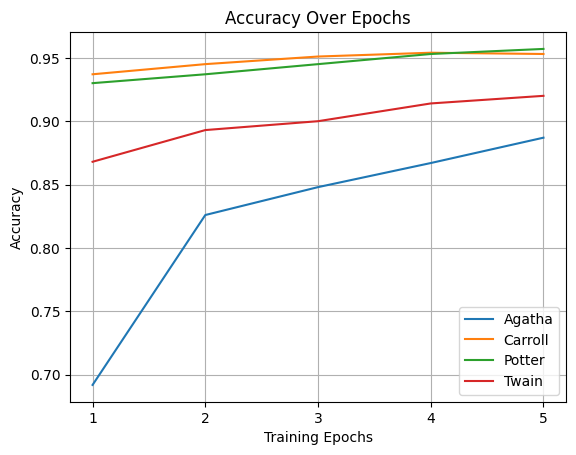

In [4]:
import matplotlib.pyplot as plt

def plot_accuracy(epoch_accuracy):
    epoch_names = {1: 'Agatha', 2: 'Carroll', 3: 'Potter', 4: 'Twain'}
    for epoch, accuracies in epoch_accuracy.items():
        plt.plot(list(range(1, len(accuracies) + 1)), accuracies, label=epoch_names.get(epoch))

    plt.xlabel('Training Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.grid(True)
    plt.legend()
    plt.xticks(range(1, len(accuracies) + 1))  # Set x-axis ticks to integer values
    plt.show()

# example
epoch_accuracy = {
    1: [0.692, 0.826, 0.848, 0.867, 0.887],  # Shakespeare_Agatha
    2: [0.937, 0.945, 0.951 ,0.954, 0.953],  # Shakespeare_Carroll
    3: [0.930, 0.937, 0.945, 0.953, 0.957],  # Shakespeare_Potter
    4: [0.868, 0.893, 0.900, 0.914, 0.920]   # Shakespeare_Twain
}

plot_accuracy(epoch_accuracy)


---

# Loss Plotting Over Epochs

This section illustrates the loss trends across multiple training epochs for our training (Shakespeare vs. different authors).
## Plotting Loss

1. *Function Description:*
   - The plot_loss function generates a line plot showing the loss over epochs for each author.
   - It takes a dictionary epoch_loss as input, where keys represent epochs and values represent loss lists.

2. *Visualization:*
   - The line plot display loss trends for comparing Shakespeare with the authors - Agatha, Carroll, Potter, and Twain over multiple epochs.

3. *Plot Customization:*
   - X-axis: Training epochs
   - Y-axis: Loss
   - Title: Loss Over Epochs
   - Grid lines: Enabled for better visualization
   - Legend: Indicates author names
   - X-axis ticks: Set to integer values representing epochs

## Implementation Details

- *Programming Language:* Python
- *Library Used:* Matplotlib
- *Input Data:* Loss values for each author over multiple epochs
- *Output:* Line plot visualizing loss trends

## Example Usage

- The provided example epoch_loss dictionary contains loss values for each author over multiple epochs.
- The plot_loss function generates a line plot based on these loss values.

---

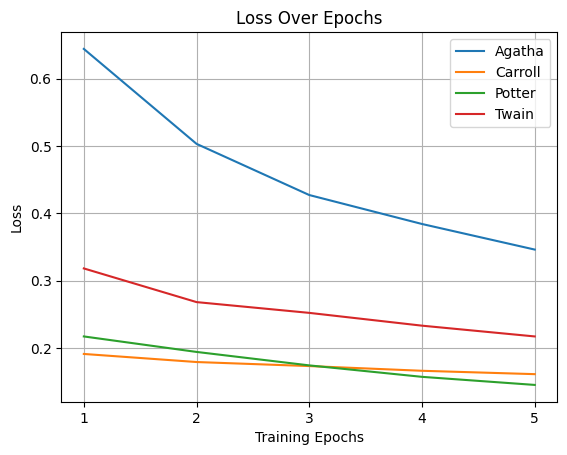

In [5]:
import matplotlib.pyplot as plt

def plot_loss(epoch_loss):
    epoch_names = {1: 'Agatha', 2: 'Carroll', 3: 'Potter', 4: 'Twain'}
    for epoch, losses in epoch_loss.items():
        plt.plot(list(range(1, len(losses) + 1)), losses, label=epoch_names.get(epoch))

    plt.xlabel('Training Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.grid(True)
    plt.legend()
    plt.xticks(range(1, len(losses) + 1))  # Set x-axis ticks to integer values
    plt.show()

# example
epoch_loss = {
    1: [0.644, 0.503, 0.427, 0.384, 0.346],  # Shakespeare_Agatha
    2: [0.191, 0.179, 0.173, 0.166, 0.161],  # Shakespeare_Carroll
    3: [0.217, 0.194, 0.174, 0.157, 0.145],  # Shakespeare_Potter
    4: [0.318, 0.268, 0.252, 0.233, 0.217]   # Shakespeare_Twain
}

plot_loss(epoch_loss)